# Outline

1. Loss metrics (Cross-Entropy)
2. Accuracy metrics:
    - Confusion matrix
    - Recall
    - Precision
    - F1 score
3. Kaggle Exercises on Regression


## 1. Binary Cross Entropy Loss

### Binary loss classification 
If we have a dataset of images of apples and not-apples, we can label the apple images as y=1 and the rest as y=0. The classifier with output a probability (using a softmax function as the last layer) of whether the image is of an apple or not (ex. $\hat{Y}=0.9$)

#### Implementations:

* PyTorch: [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) combines `LogSoftmax` and `NLLLoss` in one single class.
    - `nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')`
    - Sample code: 
    ```python
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
       ```
* Scikit: [Log Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
    - `sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)`
    - Sample code:
```python
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])
```


Let's try to understand the full Cross-Entropy Loss function:

$L_{CE} = -\frac{1}{n}\sum^n_{i=1}Y_i \cdot \log{\hat{Y}_i} - (1-Y_i) \cdot \log(1-\hat{Y}_i)$


Let's start with understanding why we use logarithm to calculate cross-entropy loss:
(images: courtesy [Vladimir Haltakov](https://twitter.com/haltakov/status/1448353272373432322))
<img src="images/00_binary_loss.png" alt="Binary Loss" style="width: 600px;"/>

Some code to make this clear (no frameworks used for now):

In [2]:
# Just some utility stuff
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
predictions = np.arange(0.01, 1, 0.01)
log_predictions = np.log(predictions)
data = pd.DataFrame({'x': np.arange(0.01,1.01,0.01)})
data['log'] = np.log(data['x'])

[(-5.0, 0.0)]

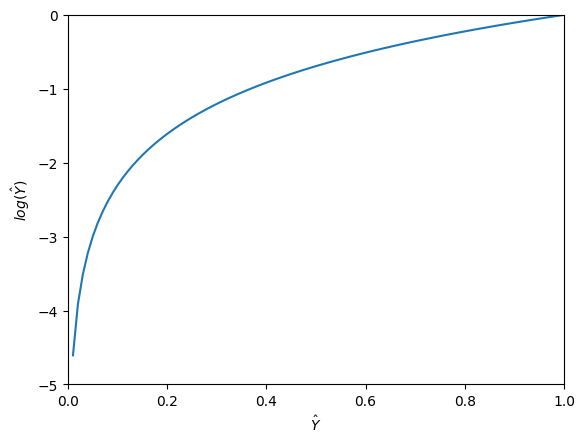

In [5]:
h = sns.lineplot(data=data, x='x', y='log')
sns.set_style("ticks",{'axes.grid' : True})
h.set(xlabel="$\hat{Y}$", ylabel='$log(\hat{Y})$')
h.set(xlim=(0,1))
h.set(ylim=(-5,0))

Full equation


<img src="images/00_binary_loss_full_eqn3.png" alt="Binary Loss" style="width: 600px;"/>

In [6]:
def binary_cross_entropy_loss(target, predicted):
    loss = 0
    
    for i, y in enumerate(target):
        y_hat = predicted[i]
        loss += y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
        
    return -loss/len(target)

In [7]:
data = {
    'target': [1, 0, 0, 1],
    'predicted_good': [0.9, 0.1, 0.2, 0.8],
    'predicted_bad': [0.6, 0.7, 0.8, 0.1]
}

In [8]:
print("BCE loss (good)", binary_cross_entropy_loss(data['target'], data['predicted_good']))
print("BCE loss (bad)", binary_cross_entropy_loss(data['target'], data['predicted_bad']))

BCE loss (good) 0.164252033486018
BCE loss (bad) 1.4067053583800182


## 2. Accuracy metrics

Let's assume we trained our model to return the following results:


### Binary Classification

| Label  | Meaning       |
| --| --       |
|🔵 | Positive  |
|🔴 | Negative  |
|✔️ | True Positive |
|✘ | False Negative, False Positive|


| Num | Ground Truth | Predicted | Eval | Label | 
|-----| --- | --- | --- |---|
|  1  | 🔵 | 🔵 | ✔️  | TP |
|  2  | 🔵 | 🔵 | ✔️ | TP |
|  3  | 🔵 | 🔵 | ✔️ | TP |
|  4  | 🔵 | 🔵 | ✔️ | TP |
|  5  | 🔵 | 🔴 | ✘  | **FN** |
|  6  | 🔵 | 🔵 | ✔️ | TP |
|  7  | 🔵 | 🔵 | ✔️ | TP |
|  8  | 🔵 | 🔵 | ✔️ | TP |
|  9  | 🔵 | 🔴 | ✘  | **FN** |
| 10  | 🔵 | 🔵 | ✔️ | TP |
| 11  | 🔴 | 🔴 | ✔️ | TN |
| 12  | 🔴 | 🔵 | ✘ | **FP** |
| 13  | 🔴 | 🔴 | ✔️ | TN |
| 14  | 🔴 | 🔴 | ✔️ | TN |
| 15  | 🔴 | 🔵 | ✘ | **FP** |
| 16  | 🔴 | 🔴 | ✔️ | TN |

### Confusion Matrix

|   | Predicted 🔵 | Predicted 🔴 |
| -- | -- | -- |
| Actual Class   🔵 | 8 (TP) | 2 (FN) |
| Actual Class   🔴 | 4 (FP) | 4 (TN) |

### Accuracy
Percentage of correctly classified samples
N = 16
Incorrect = 4

$ \frac{T}{T+F} = 75\%$

### Recall

$ \frac{TP}{TP+FN} = \frac{8}{8+2} = 80\%$

### Precision

$ \frac{TP}{TP+FP} = \frac{8}{8+2} = 80\%$

### F1 Score

$ \frac{2 \cdot TP}{2 \cdot TP + FN + FP } = \frac{2*8}{8+ 2 + 2} = 1.33$




## 3. Regression & plots

500 Person Gender-Height-Weight-Body Mass Index
Height and Weight random generated, Body Mass Index Calculated

Kaggle [link](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex)

In [10]:
!pip install rich

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python -m pip install --upgrade pip


           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

    Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


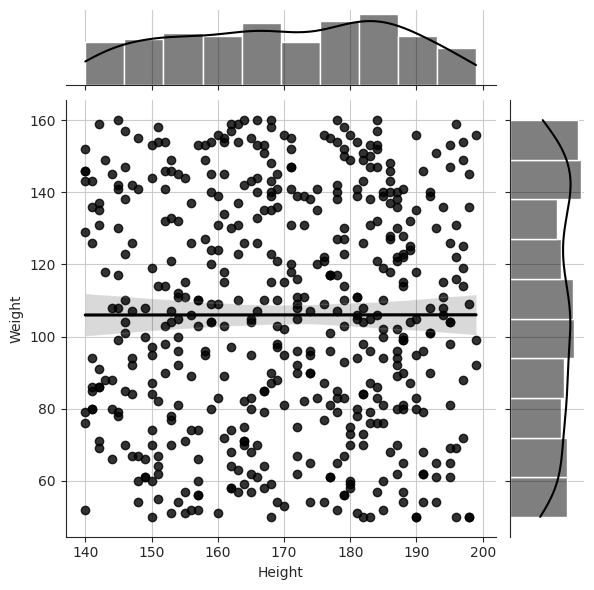

In [11]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import rich

df_hw_biased=pd.read_csv('dataset/500_Person_Gender_Height_Weight_Index.csv')
print(df_hw_biased.describe())
print('\n',df_hw_biased.head())
h=seaborn.jointplot(data=df_hw_biased, x='Height', y='Weight', kind='reg', color='k')

#hw_plot.savefig("Fig_height_weight_biased.png")

Another example: Penguins dataset

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

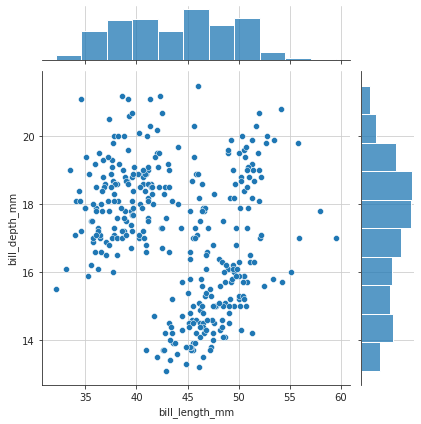

In [38]:
print("\n[bold red]Another example[/bold red]: Penguins dataset\n")

penguins = sns.load_dataset("penguins")
print(penguins.describe())
h = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
